<a href="https://colab.research.google.com/github/Alekhya253/CS-GO/blob/main/CS_GO_Round_Winner_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CS:GO Round Winner Classification***

---

To develop a classification which can predict who wins individual snapshots of rounds.


**Context**


*   CS:GO is a tactical shooter, where 2 teams (CT and Terrorist) play for best of 30 rounds.
*   There are 5 players
on each team (10 in total) and the first team to reach 16 rounds wins the game.
* You win a round as a Terrorist by either planting the bomb and making sure it
explodes, or by eliminating the other team.
*  You win a round as CT by either
eliminating the other team, or by disarming the bomb, should it have been
planted.



Importing libraries:

In [ ]:
import pandas as pd
import numpy as np


Reading data:

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Team_9/csgo_round_snapshots.csv.zip')

In [ ]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


**Data Exploration**

In [ ]:
#checking null values
data.isnull().any()


time_left                    False
ct_score                     False
t_score                      False
map                          False
bomb_planted                 False
                             ...  
ct_grenade_molotovgrenade    False
t_grenade_molotovgrenade     False
ct_grenade_decoygrenade      False
t_grenade_decoygrenade       False
round_winner                 False
Length: 97, dtype: bool

In [ ]:
data.isnull().sum().sum()

0

adding t_win col


In [ ]:
data['t_win'] = data.round_winner.astype("category").cat.codes

In [ ]:
data.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [ ]:
data.shape

(122410, 98)

**Data Preprocessing**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Finding correlations and selecting top 25 columns

In [ ]:
correlations = data.corr()
print(correlations['t_win'].apply(abs).sort_values(ascending = False).iloc[:25])

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

In [ ]:
selected_columns = []
for col in data:
  try:
    if abs(correlations[col]['t_win']) > 0.15:
      selected_columns.append(col)
  except KeyError:
      pass
data_selected = data[selected_columns]
#print(data_selected)

In [ ]:
data_selected

,bomb_planted,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,...,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,False,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,False,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,False,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,True,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,...,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,False,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,...,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1



**Data Visualization**

Plotting HeatMap

<Axes: >

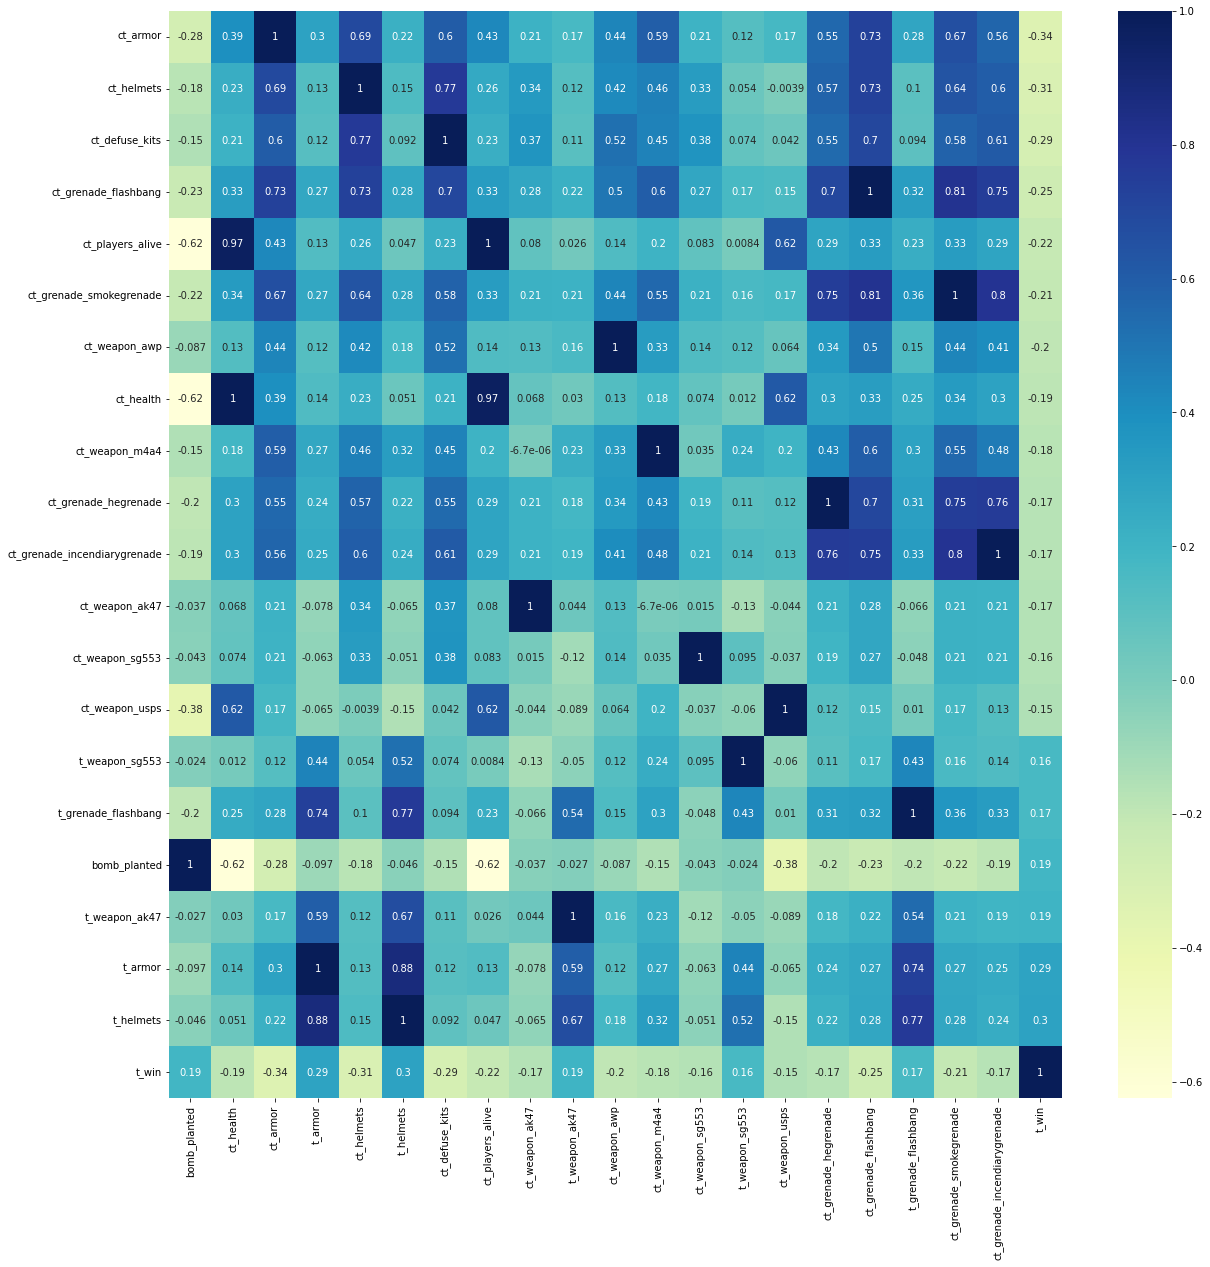

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(data_selected.corr().sort_values(by = 't_win'), annot = True, cmap = "YlGnBu")

Plotting a Histogram

array([[<Axes: title={'center': 'ct_health'}>,
        <Axes: title={'center': 'ct_armor'}>,
        <Axes: title={'center': 't_armor'}>,
        <Axes: title={'center': 'ct_helmets'}>],
       [<Axes: title={'center': 't_helmets'}>,
        <Axes: title={'center': 'ct_defuse_kits'}>,
        <Axes: title={'center': 'ct_players_alive'}>,
        <Axes: title={'center': 'ct_weapon_ak47'}>],
       [<Axes: title={'center': 't_weapon_ak47'}>,
        <Axes: title={'center': 'ct_weapon_awp'}>,
        <Axes: title={'center': 'ct_weapon_m4a4'}>,
        <Axes: title={'center': 'ct_weapon_sg553'}>],
       [<Axes: title={'center': 't_weapon_sg553'}>,
        <Axes: title={'center': 'ct_weapon_usps'}>,
        <Axes: title={'center': 'ct_grenade_hegrenade'}>,
        <Axes: title={'center': 'ct_grenade_flashbang'}>],
       [<Axes: title={'center': 't_grenade_flashbang'}>,
        <Axes: title={'center': 'ct_grenade_smokegrenade'}>,
        <Axes: title={'center': 'ct_grenade_incendiarygrenad

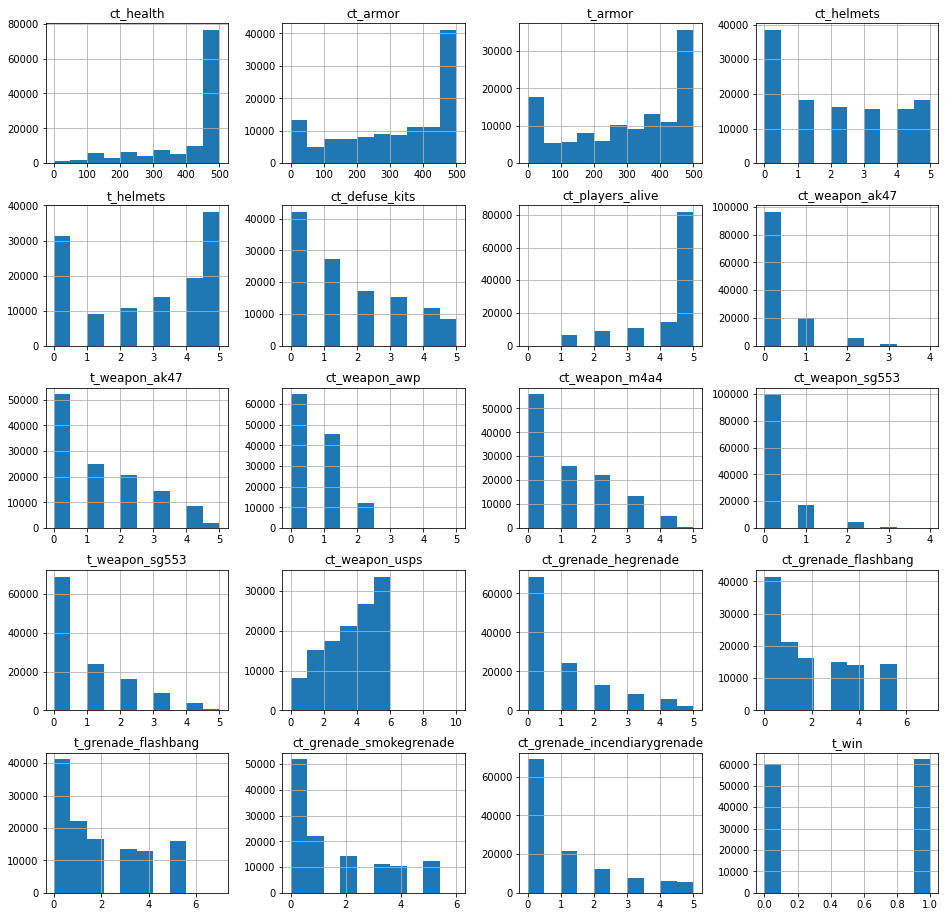

In [ ]:
data_selected.hist(figsize = (16,16))

Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = data_selected.drop(['t_win'], axis = 1), data_selected['t_win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#**KNN algorithm**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test_scaled, y_test)

0.7653377991994118

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_neighbors" : list(range(5,17,2)),
    "weights" : ['uniform', 'distance']
}
knn = KNeighborsClassifier(n_jobs = 4)
clf = RandomizedSearchCV(knn, param_grid, n_jobs = 4, n_iter = 3, verbose = 2, cv = 3)
clf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=4), n_iter=3,
                   n_jobs=4,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [ ]:
knn = clf.best_estimator_

In [ ]:
knn.score(X_test_scaled, y_test)

0.7833101870762192

**ROC Curve**

In [ ]:
from sklearn.metrics import RocCurveDisplay

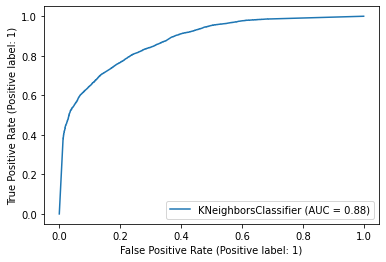

In [ ]:
RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.show()

**Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = knn.predict(X_test_scaled)

In [ ]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int8)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78     12077
           1       0.80      0.77      0.78     12405

    accuracy                           0.78     24482
   macro avg       0.78      0.78      0.78     24482
weighted avg       0.78      0.78      0.78     24482



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[9629 2448]
 [2857 9548]]


#**Random Forest Alogrithm** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Forest = RandomForestClassifier(n_jobs = 4)
Forest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=4)

In [ ]:
Forest.score(X_test_scaled, y_test)

0.8283228494404052

**ROC Curve**

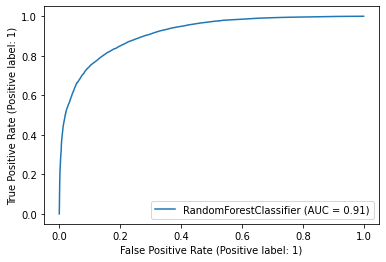

In [ ]:
RocCurveDisplay.from_estimator(Forest, X_test_scaled, y_test)
plt.show()

**Evaluation**

In [ ]:
rf_y_pred = Forest.predict(X_test_scaled)

In [ ]:
rf_y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int8)

In [ ]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     12077
           1       0.84      0.82      0.83     12405

    accuracy                           0.83     24482
   macro avg       0.83      0.83      0.83     24482
weighted avg       0.83      0.83      0.83     24482



In [ ]:
print(confusion_matrix(y_test,rf_y_pred))

[[10102  1975]
 [ 2228 10177]]


#**Neural Network Classification**

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape = (20,)))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5)

X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)
model.fit(X_train_scaled_train, y_train_train, epochs=30, callbacks=[early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/30
2602/2602 [==============================] - 8s 3ms/step - loss: 0.4562 - accuracy: 0.7575 - val_loss: 0.4645 - val_accuracy: 0.7559
Epoch 2/30
2602/2602 [==============================] - 11s 4ms/step - loss: 0.4532 - accuracy: 0.7580 - val_loss: 0.4589 - val_accuracy: 0.7584
Epoch 3/30
2602/2602 [==============================] - 8s 3ms/step - loss: 0.4502 - accuracy: 0.7607 - val_loss: 0.4548 - val_accuracy: 0.7611
Epoch 4/30
2602/2602 [==============================] - 8s 3ms/step - loss: 0.4461 - accuracy: 0.7644 - val_loss: 0.4504 - val_accuracy: 0.7638
Epoch 5/30
2602/2602 [==============================] - 8s 3ms/step - loss: 0.4427 - accuracy: 0.7664 - val_loss: 0.4482 - val_accuracy: 0.7701
Epoch 6/30
2602/2602 [==============================] - 7s 3ms/step - loss: 0.4386 - accuracy: 0.7707 - val_loss: 0.4422 - val_accuracy: 0.7696
Epoch 7/30
2602/2602 [==============================] - 10s 4ms/step - loss: 0.4342 - accuracy: 0.7730 - val_loss: 0.4398 - val_accurac

**Evaluation**

In [ ]:
model.evaluate(X_test_scaled, y_test)

766/766 [==============================] - 5s 6ms/step - loss: 0.5524 - accuracy: 0.7637


[0.5524204969406128, 0.7637039422988892]

In [ ]:
nn_y_pred = model.predict(X_test_scaled)

766/766 [==============================] - 2s 2ms/step


**ROC Curve**

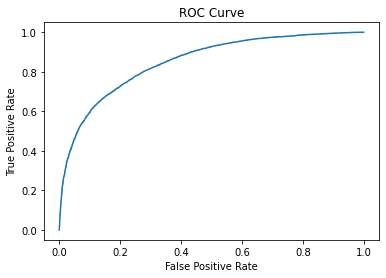

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, nn_y_pred.flatten())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
nn_y_pred

array([[0.37772727],
       [0.9890754 ],
       [0.81023026],
       ...,
       [0.574467  ],
       [0.97646785],
       [0.3496093 ]], dtype=float32)